# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis. 

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

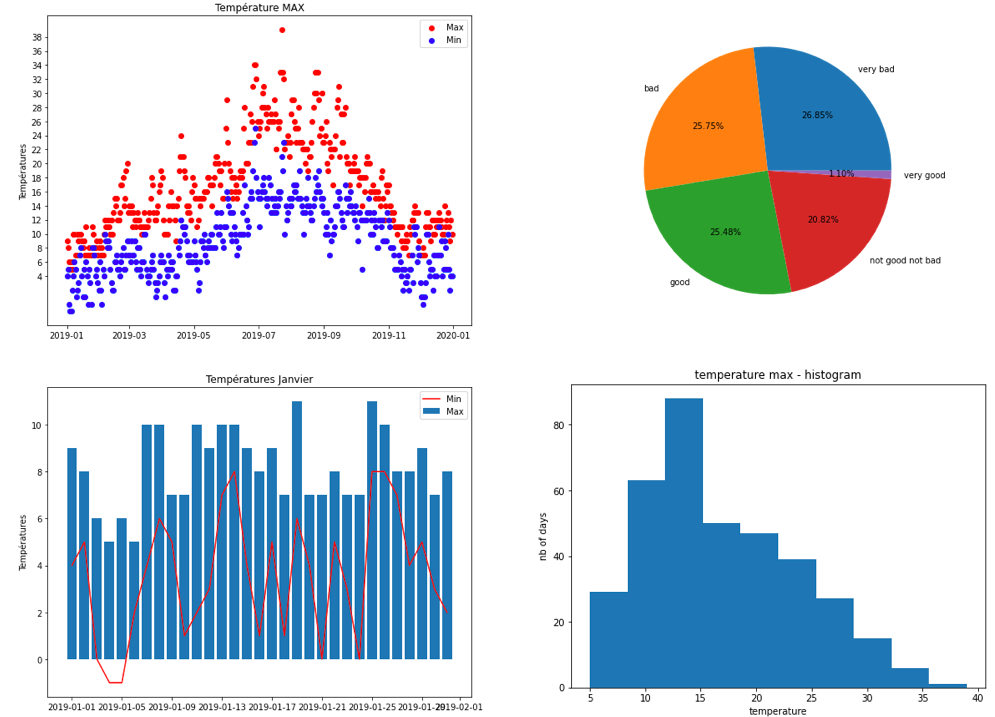

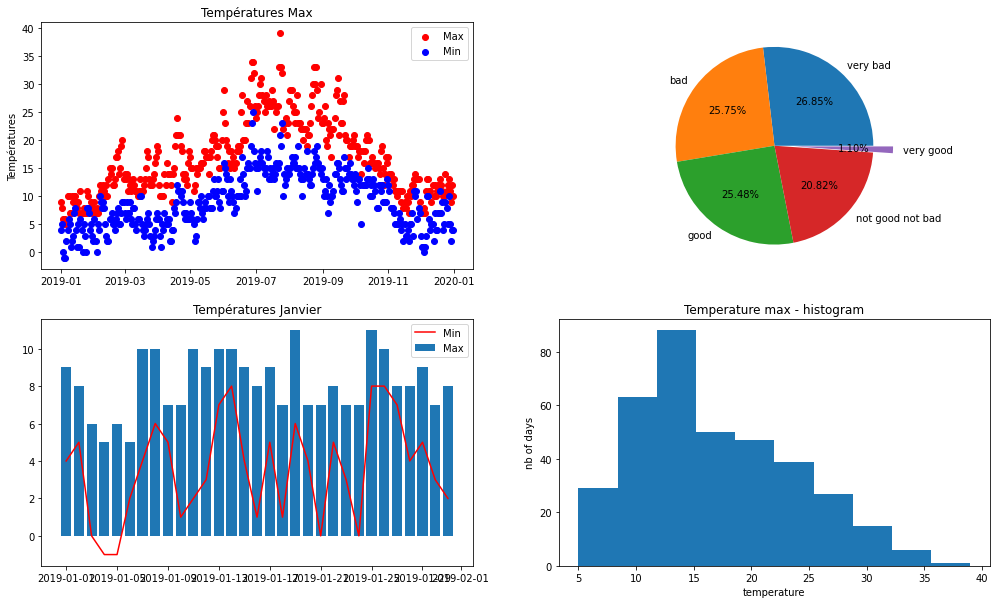

In [33]:
figure, ax = plt.subplots(2,2, figsize = (17, 10))

# figure 1

ax[0,0].scatter(x = df_weather['DATE'], y= df_weather['MAX_TEMPERATURE_C'], color = 'red', label = 'Max')
ax[0,0].scatter(x = df_weather['DATE'], y= df_weather['MIN_TEMPERATURE_C'], color = 'blue', label = 'Min')
ax[0,0].legend()
ax[0,0].set_title('Températures Max')
ax[0,0].set_ylabel('Températures')


# figure 2 : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
df_weather_date_index = df_weather.set_index('DATE')
df_weather_jan = df_weather_date_index['2019-01-01':'2019-01-31']
ax[1,0].bar(x = df_weather_jan.index.values, height = df_weather_jan['MAX_TEMPERATURE_C'], label = 'Max')
ax[1,0].plot(df_weather_jan.index.values, df_weather_jan['MIN_TEMPERATURE_C'], color ='red', label = 'Min')
ax[1,0].legend()
ax[1,0].set_title('Températures Janvier')

# Figure 3: a pie-chart with frequencies of opinions. Could you "explode" the "very good" part ?
labels = ['very bad', 'bad', 'good', 'not good not bad', 'very good']
ax[0,1].pie(df_weather['OPINION'].value_counts(), labels = labels, autopct = '%.2f%%', explode=(0, 0, 0, 0, 0.2))

# Figure 4: For the bottom right one : an histogram with MAX Temperatures on X-axis.
ax[1,1].hist(df_weather['MAX_TEMPERATURE_C'])
ax[1,1].set_title('Temperature max - histogram')
ax[1,1].set_xlabel('temperature')
ax[1,1].set_ylabel('nb of days')

plt.show()

In [ ]:
# Complete the code below :
df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?

very bad            98
bad                 94
good                93
not good not bad    76
very good            4
Name: OPINION, dtype: int64

## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) : 
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

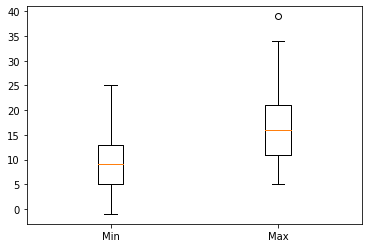

In [ ]:
# Your code here :

plt.boxplot([df_weather['MIN_TEMPERATURE_C'], df_weather['MAX_TEMPERATURE_C']], labels=['Min', 'Max'])

plt.show()

# there is one outlier on the max temperature = 39

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : 
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

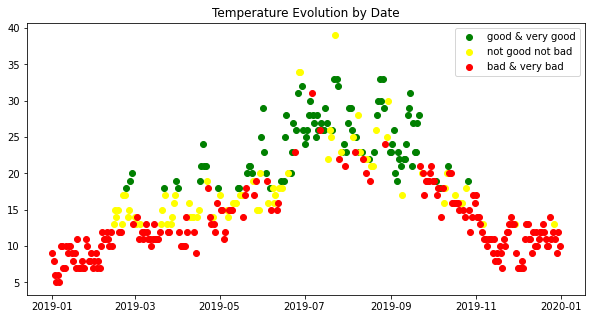

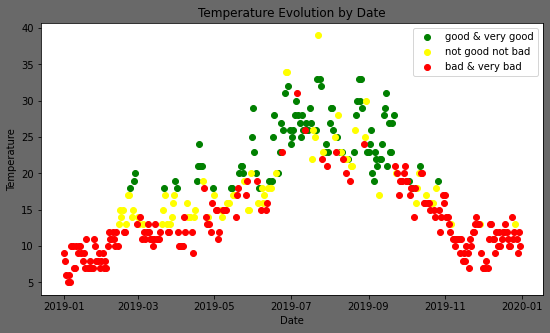

In [ ]:
# subsetting in 3 dataset:
good_very_good = df_weather[(df_weather['OPINION'] == 'good') | (df_weather['OPINION'] == 'very good')]
not_good_not_bad = df_weather[df_weather['OPINION'] == 'not good not bad']
bad_very_bad = df_weather[(df_weather['OPINION'] == 'bad') | (df_weather['OPINION'] == 'very bad')]

# plotting:
fig = plt.figure(figsize = (9, 5))
fig.patch.set_facecolor('dimgray')

plt.scatter(x = good_very_good['DATE'],y = good_very_good['MAX_TEMPERATURE_C'], color='green', label = 'good & very good')
plt.scatter(x = not_good_not_bad['DATE'],y = not_good_not_bad['MAX_TEMPERATURE_C'], color = 'yellow', label = 'not good not bad')
plt.scatter(x = bad_very_bad['DATE'],y = bad_very_bad['MAX_TEMPERATURE_C'], color='red', label = 'bad & very bad')
plt.legend()
plt.title('Temperature Evolution by Date')
plt.xlabel('Date')
plt.ylabel('Temperature')



plt.show()